<a href="https://colab.research.google.com/github/rgolds5/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [59]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def spread(x):
  mean = sum(x) / len(x)
  var = sum([(i - mean) ** 2 for i in x]) / (len(x))
  std_dev = np.sqrt(var)
  return mean, var, std_dev

print(spread(sales))

mean, var, std_dev = spread(x)

mean == np.mean(x), var == np.var(x), std_dev == np.std(x)

(3052.714285714286, 183761.06122448976, 428.67360686714756)


(True, True, True)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [68]:
cust = [127, 80, 105, 92, 120, 115, 93]

def covar(x, y):
  if len(x) == len(y):
    x_diff = [(i - spread(x)[0]) for i in x]
    y_diff = [(j - spread(y)[0]) for j in y]
    x_y_diff = [x * y for x, y in zip(x_diff, y_diff)]
    sum_x_y_diff = sum(x_y_diff)
    covar = sum_x_y_diff / (len(x))
    return covar
  else:
    raise ValueError('x and y must have an equal number of data points')
    
print(covar(cust, sales))

covar(cust, sales) == np.cov(cust, sales, bias=True)[0][1]

6518.020408163265


True

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [74]:
def corcoef(x, y):
  x_std_dev = spread(x)[2]
  y_std_dev = spread(y)[2]
  cor_std_dev = x_std_dev * y_std_dev
  corcoef = covar(x, y) / cor_std_dev
  return corcoef

print(corcoef(cust, sales))

corcoef(cust, sales) == np.corrcoef(cust, sales)[0][1] 

0.9628339778148909


True

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [92]:
import pandas as pd
pd.set_option('display.max_columns', None)

data_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

print(df.cov())

                     Unnamed: 0      pclass   survived          age  \
Unnamed: 0        143117.500000  284.357034 -53.967125 -1442.939812   
pclass               284.357034    0.701969  -0.127248    -3.954605   
survived             -53.967125   -0.127248   0.236250    -0.314343   
age                -1442.939812   -3.954605  -0.314343   165.850021   
sibsp                 25.828746    0.053090  -0.014088    -2.559806   
parch                  1.172783    0.013287   0.034776    -1.459378   
fare               -9410.735123  -24.227788   6.146023   114.416613   
body                 591.579132   -2.876653   0.000000    81.622922   
has_cabin_number     -95.438885   -0.249992   0.061406     1.463138   

                      sibsp     parch         fare         body  \
Unnamed: 0        25.828746  1.172783 -9410.735123   591.579132   
pclass             0.053090  0.013287   -24.227788    -2.876653   
survived          -0.014088  0.034776     6.146023     0.000000   
age               -2.

In [93]:
print(df.corr())

                  Unnamed: 0    pclass  survived       age     sibsp  \
Unnamed: 0          1.000000  0.897822 -0.293717 -0.296172  0.065594   
pclass              0.897822  1.000000 -0.312469 -0.366370  0.060832   
survived           -0.293717 -0.312469  1.000000 -0.050199 -0.027825   
age                -0.296172 -0.366370 -0.050199  1.000000 -0.190747   
sibsp               0.065594  0.060832 -0.027825 -0.190747  1.000000   
parch               0.003584  0.018322  0.082660 -0.130872  0.373587   
fare               -0.481215 -0.558629  0.244265  0.171892  0.160238   
body                0.015558 -0.034642       NaN  0.059059 -0.099961   
has_cabin_number   -0.603727 -0.713857  0.302250  0.271887 -0.009064   

                     parch      fare      body  has_cabin_number  
Unnamed: 0        0.003584 -0.481215  0.015558         -0.603727  
pclass            0.018322 -0.558629 -0.034642         -0.713857  
survived          0.082660  0.244265       NaN          0.302250  
age        

# Orthogonality


## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

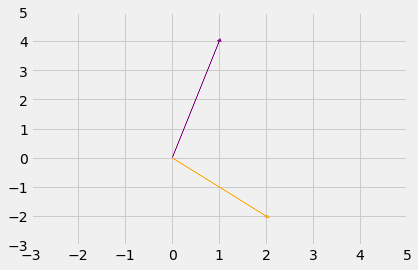


A synonym for orthogonal is perpendicular.


In [122]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

a = [1, 4]
b = [2, -2]

plt.arrow(0, 0, a[0], a[1], head_width = 0.09, 
          head_length = 0.09, color = 'purple')
plt.arrow(0, 0, b[0], b[1],  head_width = 0.09, 
          head_length = 0.09, color = 'orange')
plt.xlim(-3, 5)
plt.ylim(-3, 5)
plt.show()

print(f'\nA synonym for orthogonal is perpendicular.' )

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [103]:
a = [-5, 3, 7]
b = [6, -8, 2]

if np.dot(a, b) == 0:
  print(f'The vectors are orthognal since the dot product is equal to zero.')
else:
  print(f'The vectors are NOT orthogonal since the dot product is NOT equal to zero.')

The vectors are NOT orthogonal since the dot product is NOT equal to zero.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [112]:
c = [2, -15, 6, 20]

print((np.linalg.norm(c) ** 2))
print(np.dot(c, c))
print(np.multiply(np.transpose(c), c))

665.0
665
[  4 225  36 400]


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = 2\hat{i} + 12\hat{j}\\\\e = 2\hat{i} +11\hat{j} - 8\hat{k}
\end{align}



## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [124]:
f = [4, 12, 11, 9, 2]

f_unit = [((1 / np.linalg.norm(f)) * i) for i in f]

f_unit

[0.20908334939572668,
 0.62725004818718,
 0.5749792108382483,
 0.470437536140385,
 0.10454167469786334]

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

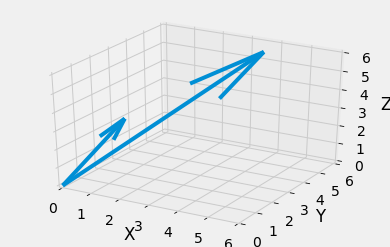

In [127]:
from mpl_toolkits.mplot3d import Axes3D
v1_v2 = np.array([[0, 0, 0, 
                 1, 
                 2, 
                 3],
                [0, 0, 0, 
                 4, 
                 5, 
                 6]])

X, Y, Z, U, V, W = zip(*v1_v2)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.quiver(X, Y, Z, U, V, W, length = 1)
ax.set_xlim([0, 6])
ax.set_ylim([0, 6])
ax.set_zlim([0, 6])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

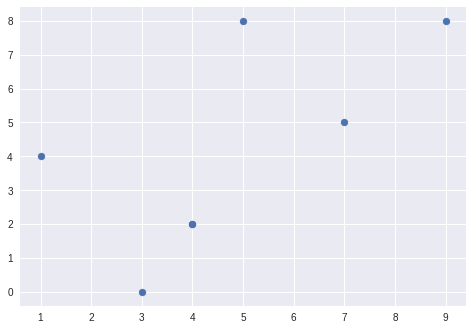

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()